In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]=''
import tensorflow as tf
import numpy as np
import numpy.random as rng
from data_loader.data_generator import MNISTDataGenerator, LinearDataGenerator
from models.npmodels import NPModel4,DirectNPModel4,AENPModel,AEDFANPModel
from trainers.sf_trainer import SFTrainer, AESFTrainer
from utils.config import process_config
import shutil
import numpy as np
import matplotlib.pyplot as plt



import pickle
import itertools
from utils.utils import tf_matmul_r, tf_matmul_l, tf_eigvecs, tf_eigvals



In [2]:
iteration =10000
with open('Analysis_synthetic.pkl','rb') as f:
    store_al,store_df,store_err,combo,eta_1,eta_lmda,non_converge=pickle.load(f,encoding='latin1')

In [3]:
store_err_s=[]
store_al_s=[]
store_df_s=[]
print("Following indexes did not converge",non_converge)
for count in range(store_err.shape[0]):
    if count in non_converge:
        print("removing row:",count)
    else:
        store_err_s.append(store_err[count,:]) 
#         store_al_s.append(store_al[count,:])


store_err_s=np.array(store_err_s)

for val in sorted(non_converge,reverse=True):
    del combo[val]
eta_1new=[]
eta_lmdanew=[]
for first,second in combo:
    if first not in eta_1new:
        eta_1new.append(first)
    if second not in eta_lmdanew:
        eta_lmdanew.append(second)
eta_1new=np.array(eta_1new)
eta_lmdanew=np.array(eta_lmdanew)

Following indexes did not converge [9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
removing row: 9
removing row: 19
removing row: 29
removing row: 39
removing row: 49
removing row: 59
removing row: 69
removing row: 79
removing row: 89
removing row: 99


In [4]:
#storing last values for error and reshaping into appropriate format
last_val=np.zeros([eta_1new.shape[0]*eta_lmdanew.shape[0],1])
for num in range(store_err_s.shape[0]):
    last_val[num]=store_err_s[num][-1]
reshape_err=np.flipud(np.reshape(last_val,[eta_1new.shape[0],eta_lmdanew.shape[0]]))
#reshape_err = np.reshape(last_val, [eta_1new.shape[0], eta_lmdanew.shape[0]]).T



In [5]:
lf_df=np.zeros([eta_1.shape[0]*eta_lmda.shape[0],10]) #stores last 10 norm_dfs
mean_df=np.zeros([eta_1.shape[0]*eta_lmda.shape[0],1]) #stores mean of last 10 norm_dfs
for num in range(store_df.shape[0]):
    lf_df[num,:]=store_df[num,iteration-10:iteration]
    mean_df[num]=np.mean(store_df[num,iteration-10:iteration])
    
reshape_df=np.flipud(np.reshape(mean_df,[eta_1.shape[0],eta_lmda.shape[0]]))

In [6]:
last_al=np.zeros([eta_1.shape[0]*eta_lmda.shape[0],1])
for num2 in range(store_al.shape[0]):
    last_al[num2]=store_al[num2][-1]

reshape_al=np.flipud(np.reshape(last_al,[eta_1.shape[0],eta_lmda.shape[0]]))

In [7]:
# # x=[i for i in range(iteration)]
# for i in range(len(store_err_s)):
#     leg='Combination '+str(i+1)
#     plt.plot(store_err_s[i,:],label=leg)
# plt.legend()
# plt.show()

In [8]:
eta_xtick=np.sort(eta_1new)
for x in range(len(eta_1new)):
    eta_xtick[x]="%0.1e" % eta_xtick[x]
eta_ytick=np.sort(eta_lmdanew)
for y in range(len(eta_lmdanew)):
    eta_ytick[y]="%0.1e" % eta_ytick[y]

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
h=ax.imshow(reshape_err, cmap='jet',interpolation='none')
plt.colorbar(h,ax=ax)
xlabels = [item.get_text() for item in ax.get_xticklabels()]
ylabels = [item.get_text() for item in ax.get_yticklabels()]

In [10]:
ax.get_yticklabels()

<a list of 7 Text yticklabel objects>

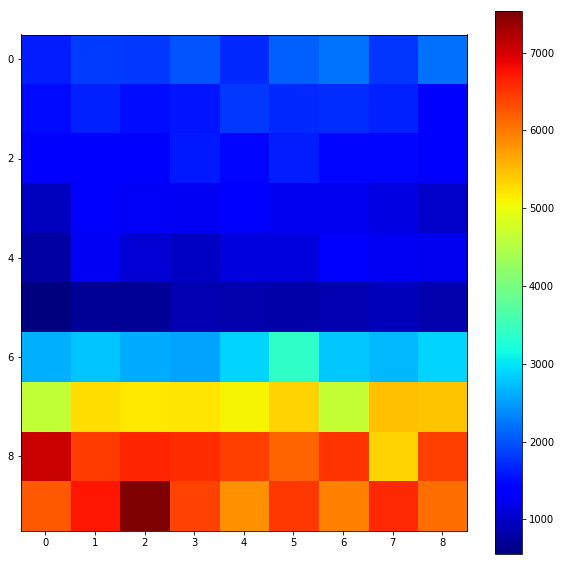

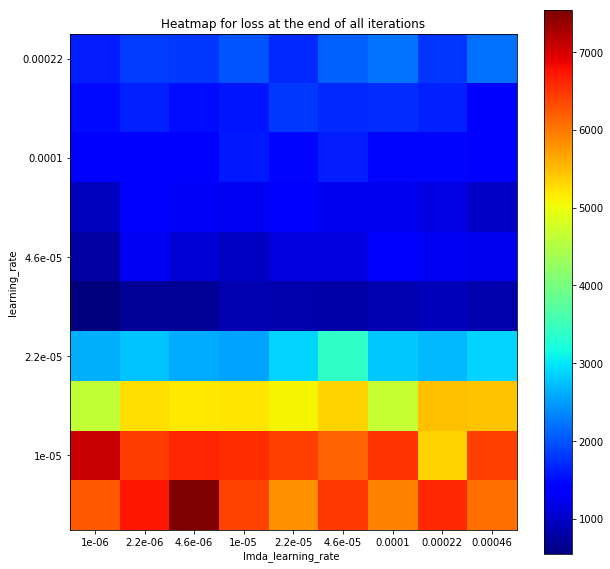

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
# plt.axes(xscale='log',yscale='log')
# ax.locator_params(axis='y',nbins=len(eta_ytick))
# ax.locator_params(axis='x',nbins=len(eta_xtick))
h=ax.imshow(reshape_err, cmap='jet',interpolation='none')
plt.colorbar(h,ax=ax)
xlabels = [item.get_text() for item in ax.get_xticklabels()]
xlabels[1:eta_xtick.shape[0]+1]=eta_xtick
ax.set_xticklabels(xlabels)
# ax.set_xticklabels([str(eta) for eta in eta_xtick])


ylabels = [item.get_text() for item in ax.get_yticklabels()]
ylabels[1:eta_ytick.shape[0]+1]=eta_ytick
ax.set_yticklabels(ylabels[::-1])


# ax.set_xticks(strings)
# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end, 0.712123))
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01e'))

ax.locator_params(axis='x',nbins=len(eta_xtick))
ax.locator_params(axis='y',nbins=len(eta_ytick))


# ax.set_ticks(eta_xtick)

ax.set_xlabel("lmda_learning_rate ")
ax.set_ylabel("learning_rate")
plt.title("Heatmap for loss at the end of all iterations")
plt.show()

In [ ]:
eta_xtick1=np.sort(eta_1)
for x in range(len(eta_1)):
    eta_xtick1[x]="%0.1e" % eta_xtick1[x]
eta_ytick1=np.sort(eta_lmda)
for y in range(len(eta_lmda)):
    eta_ytick1[y]="%0.1e" % eta_ytick1[y]
    
    
fig,ax=plt.subplots(1,1,figsize=(10,10))

h2=plt.imshow(reshape_al,cmap='jet')
plt.colorbar(h2,ax=ax)
ax.locator_params(axis='x',nbins=len(eta_xtick1))
ax.locator_params(axis='y',nbins=len(eta_ytick1))

xlabels = [item.get_text() for item in ax.get_xticklabels()]
xlabels[1:8]=eta_xtick1
ax.set_xticklabels(xlabels)

ylabels = [item.get_text() for item in ax.get_yticklabels()]
ylabels[1:8]=eta_ytick1
ax.set_yticklabels(ylabels[::-1])


plt.title("Heat map of alignaments for all learning rates")
ax.set_xlabel("lmda_learning_rate")
ax.set_ylabel("learning_rate")
plt.show()

In [ ]:

# eta_xtick1=eta_1[::-1]

# eta_xtick1[0]="0.1e"%,
eta_xtick1

In [ ]:
eta_xtick1=np.sort(eta_1)
for x in range(len(eta_1)):
    eta_xtick1[x]="%0.1e" % eta_xtick1[x]
eta_ytick1=np.sort(eta_lmda)
for y in range(len(eta_lmda)):
    eta_ytick1[y]="%0.1e" % eta_ytick1[y]
    
    
fig,ax=plt.subplots(1,1,figsize=(10,10))

h2=plt.imshow(reshape_al,cmap='jet')
plt.colorbar(h2,ax=ax)
ax.locator_params(axis='x',nbins=len(eta_xtick1))
ax.locator_params(axis='y',nbins=len(eta_ytick1))

xlabels = [item.get_text() for item in ax.get_xticklabels()]
xlabels[1:8]=eta_xtick1
ax.set_xticklabels(xlabels)

ylabels = [item.get_text() for item in ax.get_yticklabels()]
ylabels[1:8]=eta_ytick1
ax.set_yticklabels(ylabels[::-1])


plt.title("Heat map of alignaments for all learning rates")
ax.set_xlabel("lmda_learning_rate")
ax.set_ylabel("learning_rate")
plt.show()

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
h3=plt.imshow(reshape_df,cmap='jet',origin='lower')
plt.colorbar(h3,ax=ax)

ax.set_xticklabels([str(eta) for eta in eta_xtick1])
ax.set_yticklabels([str(eta) for eta in eta_ytick1])
ax.locator_params(axis='x',nbins=len(eta_xtick1))
ax.locator_params(axis='y',nbins=len(eta_ytick1))

plt.title("Heatmap of mean of the the last 10 norms differences")
plt.xlabel("learning_rate")
plt.ylabel("lmda_learning_rate")
plt.show()

# for iter in range(lf_df.shape[0]):
#     leg='Combination '+str(iter+1)
#     plt.plot(lf_df[iter,:],label=leg)
# plt.title("Last 10 norm fifferences for every combination of learnig rates")
# plt.legend()
# plt.show()           
    
# # fig, ax1 = plt.subplots(1,1)
# # data = np.random.randint(0, 100, size=(10, 10))
# # ax1.imshow(data, cmap='jet', interpolation='nearest')
# # ax1.set_xticklabels(['', 0,10,20,30,40])
# # plt.show()

In [ ]:
strings = ["%.01e" % number for number in eta_1new]
eta_1new
strings

In [ ]:
# # store_err_a=np.array(store_err)
# # len(store_err)
# np.where(np.isnan(store_err)==True)
# plt.imshow(store_err,cmap='hot',interpolation='nearest',aspect='auto')
# plt.show()

In [ ]:
# heatmap = plt.pcolor(store_err)
# plt.show()

In [ ]:
str(eta_1new)